<a href="https://colab.research.google.com/github/RKulagowska/Machine_learning_bootcamp/blob/main/26_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

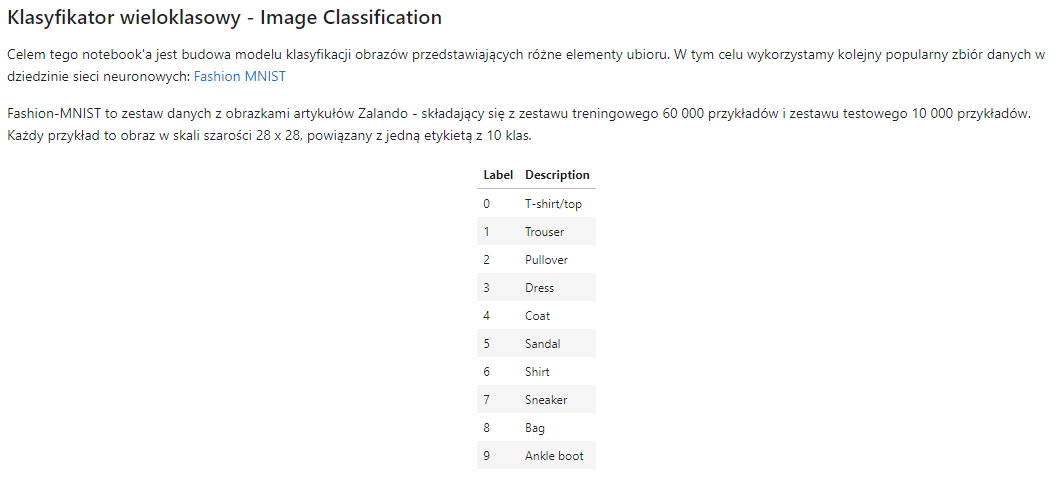

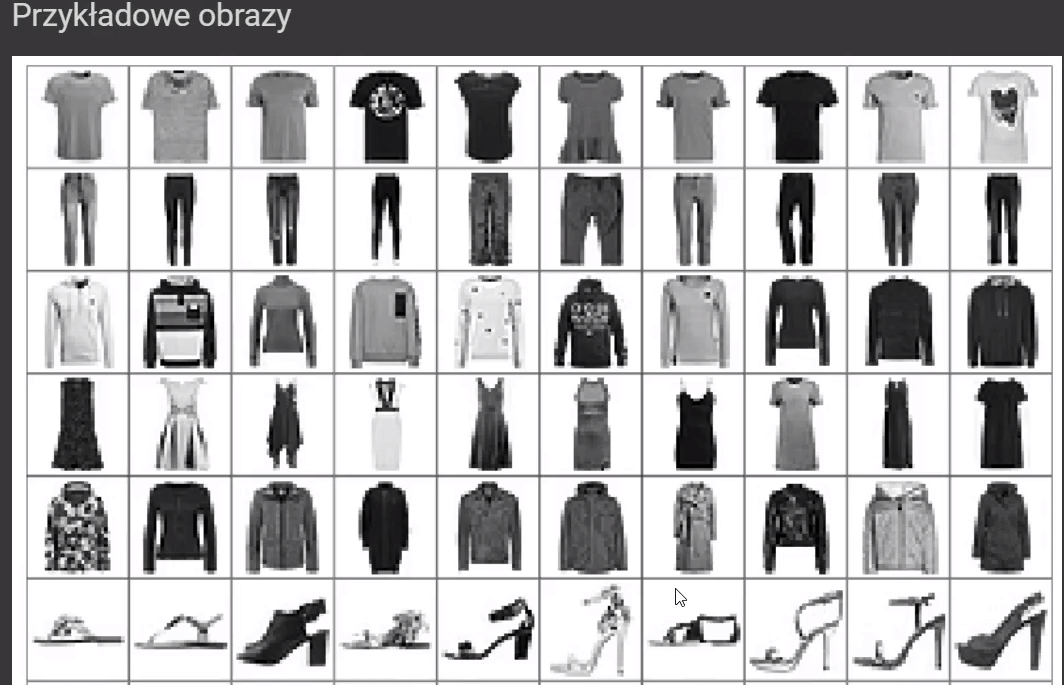

# Import bibliotek

In [1]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets.fashion_mnist import load_data

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set(font_scale=1.3)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Załadowanie danych i wstępna eksploracja

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [5]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

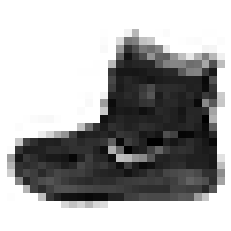

In [6]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

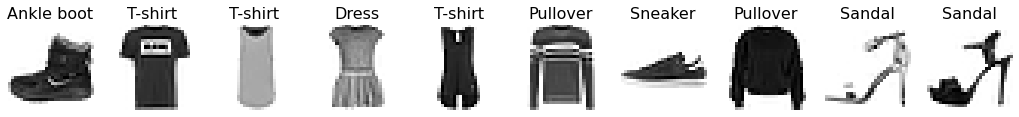

In [7]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

# Przygotowanie danych

In [8]:
X_train = X_train / 255.
X_test = X_test / 255.

In [11]:
X_train[0]

array([[0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            ],
       [0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            , 0.            ,
        0.            , 0.            , 0.            , 0.            ],
       [0.            , 0.            

In [12]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


In [13]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (60000, 784)
X_test shape: (10000, 784)


# Budowa modelu

In [14]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [15]:
y_pred = classifier.predict(X_test)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# Ocena modelu

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8828

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[857,   0,  16,  28,   3,   2,  85,   0,   9,   0],
       [  4, 962,   2,  25,   3,   0,   4,   0,   0,   0],
       [ 11,   2, 816,  16,  88,   0,  65,   0,   2,   0],
       [ 27,   3,  11, 890,  33,   0,  32,   0,   4,   0],
       [  1,   1,  87,  32, 815,   0,  61,   0,   3,   0],
       [  0,   0,   0,   1,   0, 951,   0,  33,   1,  14],
       [135,   1, 104,  27,  68,   0, 654,   0,  11,   0],
       [  0,   0,   0,   0,   0,  21,   0, 955,   0,  24],
       [  3,   1,   1,   5,   2,   2,   4,   5, 977,   0],
       [  0,   0,   0,   0,   0,  11,   1,  37,   0, 951]])

In [18]:
def plot_confusion_matrix(cm):
    # Mulitclass classification, 3 classes
    import plotly.figure_factory as ff
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=class_names, index=class_names[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=800, height=600, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     T-shirt       0.83      0.86      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.79      0.82      0.80      1000
       Dress       0.87      0.89      0.88      1000
        Coat       0.81      0.81      0.81      1000
      Sandal       0.96      0.95      0.96      1000
       Shirt       0.72      0.65      0.69      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# Błędnie sklasyfikowane obrazy

In [20]:
results = pd.DataFrame(data={'y_pred': y_pred, 'y_test': y_test})
results.head(10)

,y_pred,y_test
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
5,1,1
6,4,4
7,6,6
8,5,5
9,7,7


In [21]:
errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs[:10]

[12, 17, 23, 25, 40, 42, 49, 51, 66, 67]

In [22]:
results.loc[errors_idxs[:10], :]

,y_pred,y_test
12,5,7
17,2,4
23,5,9
25,2,4
40,0,6
42,6,3
49,6,2
51,2,4
66,3,2
67,4,3


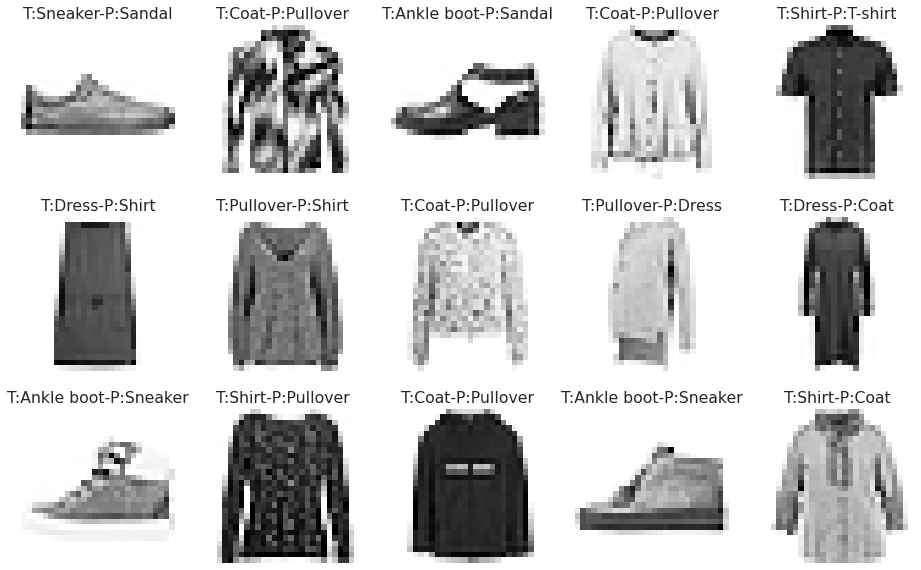

In [23]:
plt.figure(figsize=(16, 10))
for idx, error_idx in enumerate(errors_idxs[:15]):
    image = X_test[error_idx].reshape(28, 28)
    plt.subplot(3, 5, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"T:{class_names[results.loc[error_idx, 'y_test']]}-P:{class_names[results.loc[error_idx, 'y_pred']]}")

In [24]:
len(errors_idxs) / 10000

0.1172